Text(0, 0.5, 'Number of occurences')

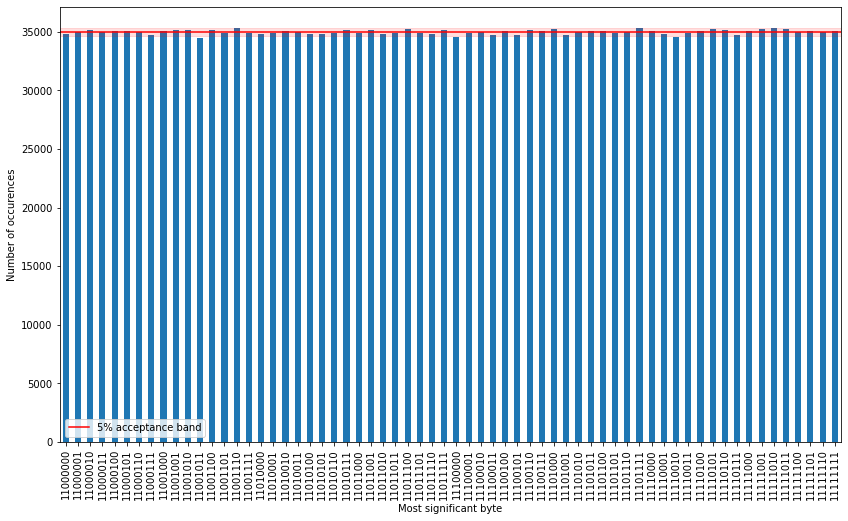

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from mpl_toolkits import mplot3d
from collections import Counter
import math

#stock_files = sorted(glob("../data/distribution/nss/nss_sieve/1strun_*.csv"))
#df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)
df = pd.read_csv("../data/distribution/nss/nss_sieve/dist_combined.csv")
df["byte"] = df["byte"].astype(str).str[:8] #only fetch first 8 characters
byte_counts = Counter(df["byte"])
df = pd.DataFrame.from_dict(byte_counts, orient='index')
#df.drop(df.tail(1).index,inplace=True)
# df += 500
exp_dist = 2240000/64 # get expected occurences per bin
conf = 1.96

ax = df.sort_index().plot(kind='bar', legend=False, figsize=(14,8))
ax.axhspan(ymin=exp_dist-(conf*math.sqrt(exp_dist)), ymax=exp_dist+(conf*math.sqrt(exp_dist)), color='red', alpha=0.125) #draw 5% confidence band
#ax.set_ylim(20000,60000)
ax.axhline(y=exp_dist,color='red')
ax.legend(["5% acceptance band"], loc=3)
ax.locator_params(axis='y', integer=True)
ax.set_xlabel("Most significant byte")
ax.set_ylabel("Number of occurences")
#ax.set_title("Distribution of generated primes in OpenSSL PGA with OpenSSL sieve, 2240000 samples")
ax.get_figure().savefig("../plots/distribution_safe_nss_nss.jpg", dpi=150)

